SAMEER KHATWANI  
PRN: 22070126099

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
# Preprocessing
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Remove punctuation and numbers
    text = re.sub(r'\W', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing to the 'review' column
df['review'] = df['review'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


In [9]:
# Vectorization
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorization
count_vect = CountVectorizer()
tfidf_vect = TfidfVectorizer()

X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

Logistic Regression with CountVectorizer


C:\Users\samee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      4961
    positive       0.88      0.89      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



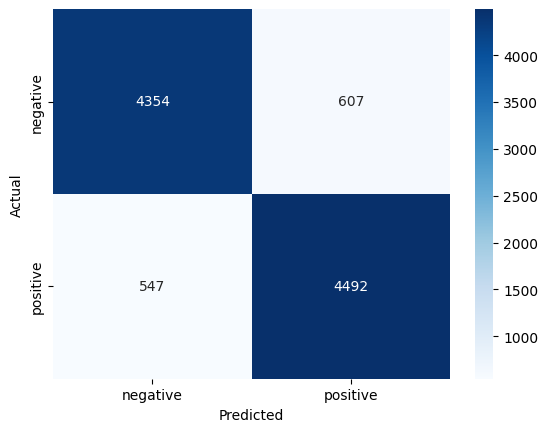

Logistic Regression with TfidfVectorizer
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



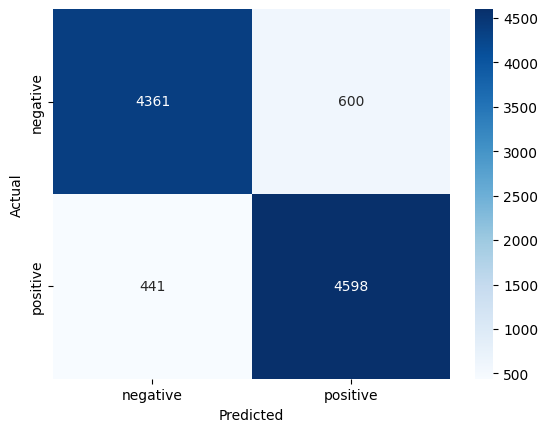

SVC with CountVectorizer
              precision    recall  f1-score   support

    negative       0.90      0.86      0.88      4961
    positive       0.87      0.91      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



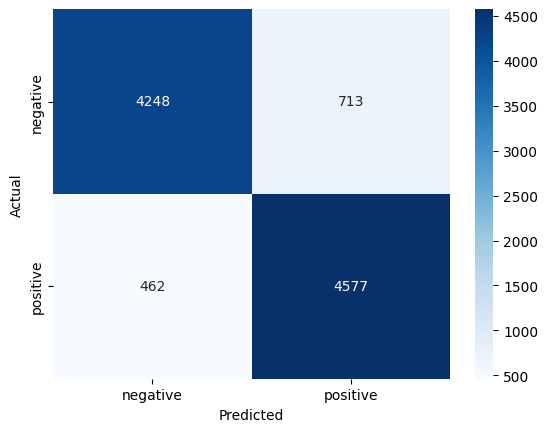

SVC with TfidfVectorizer
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.92      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



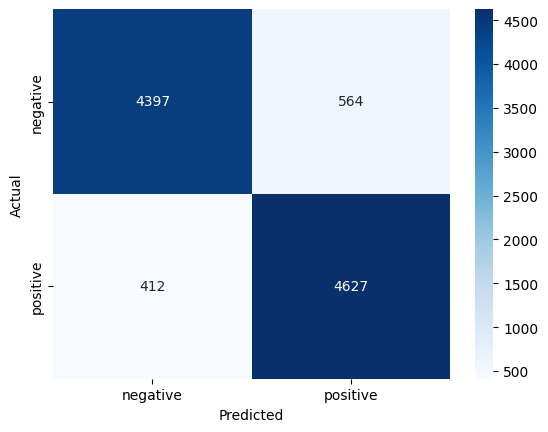

Random Forest with CountVectorizer
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      4961
    positive       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



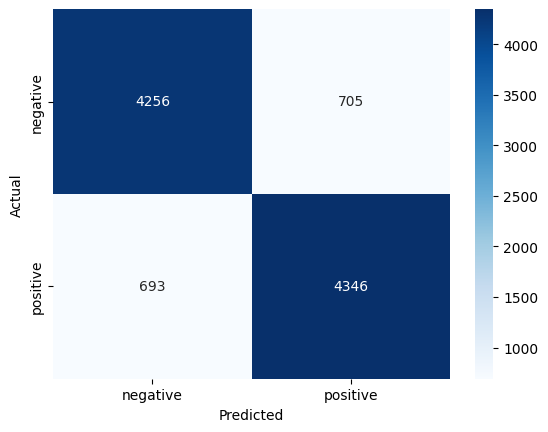

Random Forest with TfidfVectorizer
              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      4961
    positive       0.86      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



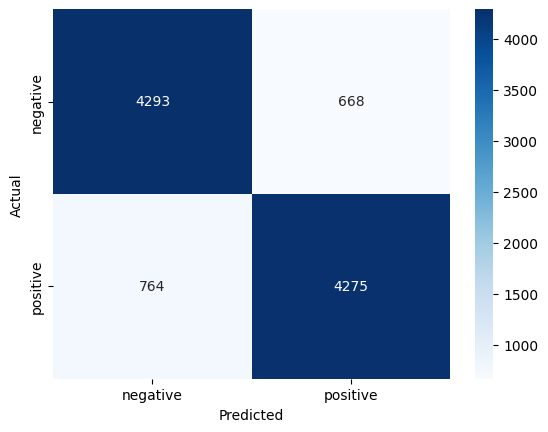

In [10]:
# Step 6: Model Training and Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Logistic Regression
print("Logistic Regression with CountVectorizer")
evaluate_model(LogisticRegression(), X_train_count, X_test_count, y_train, y_test)

print("Logistic Regression with TfidfVectorizer")
evaluate_model(LogisticRegression(), X_train_tfidf, X_test_tfidf, y_train, y_test)

# SVC
print("SVC with CountVectorizer")
evaluate_model(SVC(), X_train_count, X_test_count, y_train, y_test)

print("SVC with TfidfVectorizer")
evaluate_model(SVC(), X_train_tfidf, X_test_tfidf, y_train, y_test)

# Random Forest
print("Random Forest with CountVectorizer")
evaluate_model(RandomForestClassifier(), X_train_count, X_test_count, y_train, y_test)

print("Random Forest with TfidfVectorizer")
evaluate_model(RandomForestClassifier(), X_train_tfidf, X_test_tfidf, y_train, y_test)

